In [3]:
import pandas as pd
import numpy  as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


## LOADING DATA

In [4]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## CHECKING NULL VALUES

In [7]:
df_train.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

## REPLACING NULL VALUES WITH MEAN AS ITEM_WEIGHT IS NUMERICAL

In [ ]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**REPLACING NULL VALUES WITH MODE AS OUTLET_SIZE IS CATEGORICAL**

In [ ]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1


# **EDA** **(Exploratory Data Analysis)**

# HISTOGRAM FOR ITEM OUTLET SALES

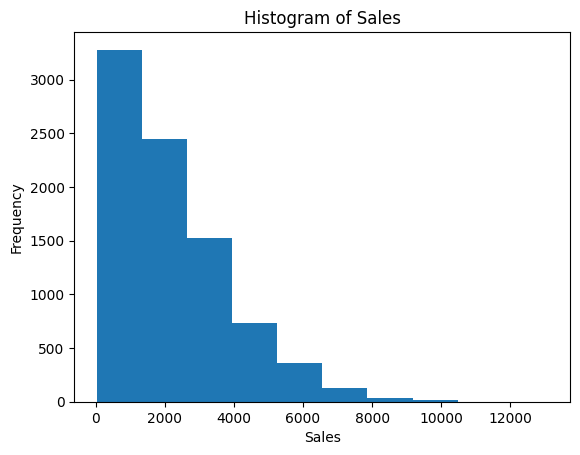

In [16]:
num_bins = 10
plt.hist(df_train['Item_Outlet_Sales'], bins=num_bins)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()


# SIDE BY SIDE BOX PLOT BETWEEN Outlet_Type and Item_Outlet_Sales





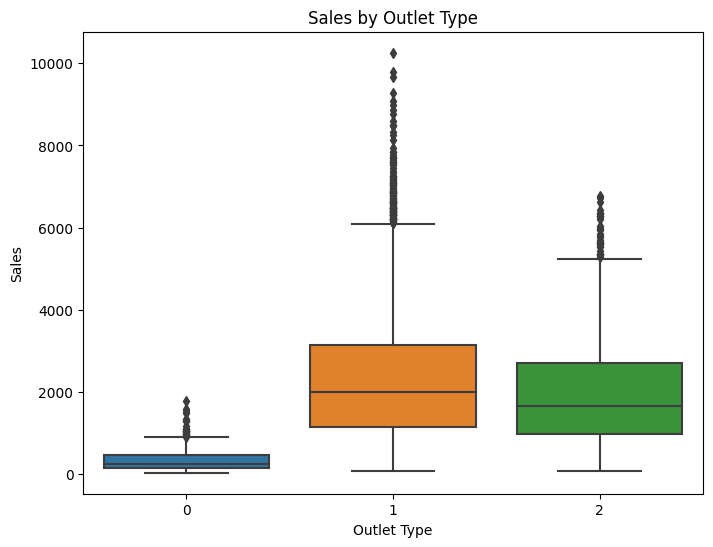

In [94]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_train)

# Adding labels and title
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.title('Sales by Outlet Type')
plt.show()


# SIDE BY SIDE BOX PLOT BETWEEN Outlet_Location_Type and Item_Outlet_Sales

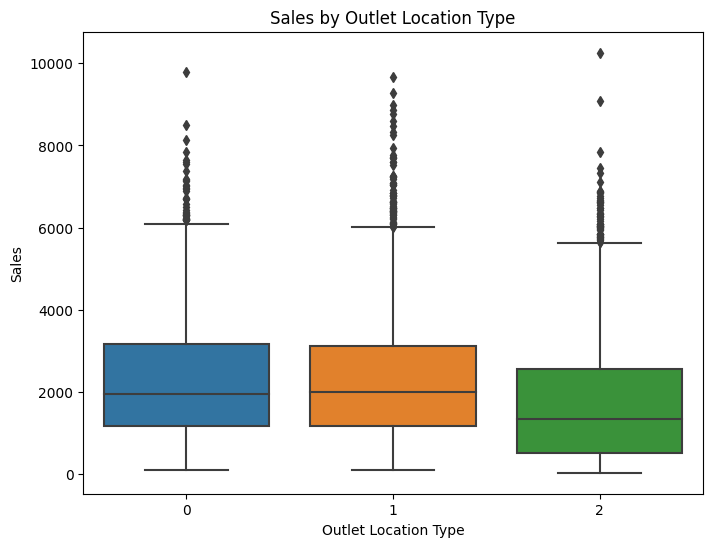

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_train)

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.title('Sales by Outlet Location Type')
plt.show()


# Scatter plot Item_Weight and Item_Outlet_Sales

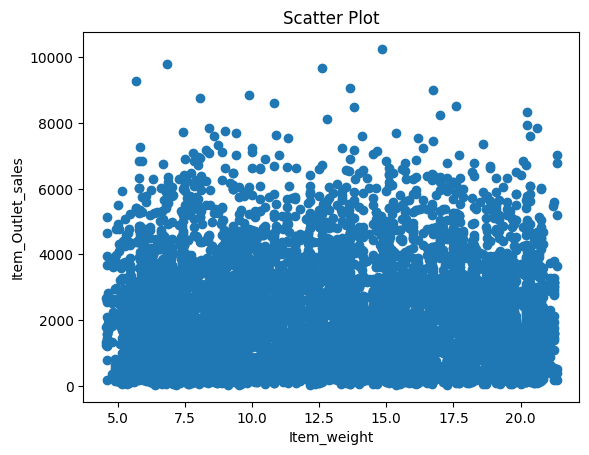

In [87]:
plt.scatter(df_train['Item_Weight'], df_train['Item_Outlet_Sales'])

# Adding labels and title
plt.xlabel("Item_weight")
plt.ylabel("Item_Outlet_sales")
plt.title("Scatter Plot")

plt.show()



# Bar Graph of Item Types

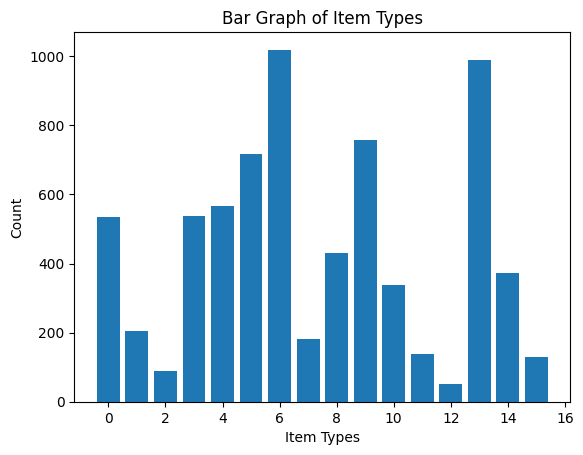

In [90]:
item_counts = df_train['Item_Type'].value_counts()
plt.bar(item_counts.index, item_counts)

plt.xlabel("Item Types")
plt.ylabel("Count")
plt.title("Bar Graph of Item Types")
plt.show()

### **PREPROCESSING DATA**

### LABEL ENCODING

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

## DATA CLEANING

In [65]:
df_train = df_train.dropna(axis=0)

# Remove columns with NaN values
df_train = df_train.dropna(axis=1)

df_test = df_test.dropna(axis=0)

# Remove columns with NaN values
df_test = df_test.dropna(axis=1)

### SPLITTING DATA

In [66]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
Y=df_train['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)


## DATA NORMALIZATION

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Removing rows with NaN values
X_train_normalized = X_train_normalized[~np.isnan(X_train_normalized).any(axis=1)]

# Removing columns with NaN values
X_train_normalized = X_train_normalized[:, ~np.isnan(X_train_normalized).any(axis=0)]
X_test_normalized = X_test_normalized[~np.isnan(X_test_normalized).any(axis=1)]

X_test_normalized = X_test_normalized[:, ~np.isnan(X_test_normalized).any(axis=0)]



(5648,)

# **IMPLEMENTING LINEAR REGRESSION**

In [84]:
def linear_regression(X, Y, learning_rate, num_iterations):
    num_samples = len(Y)
    num_features = X.shape[1]

    # Initialize the weights and bias
    w = np.zeros(num_features)
    print(w)
    b = 0
    for i in range(num_iterations):

        y_pred = np.dot(X, w) + b

        # Computing gradients
        dw = (1 / num_samples) * np.dot(X.T, (y_pred - Y))
        db = (1 / num_samples) * np.sum(y_pred -Y)

        # Updating parameters
        w -= learning_rate * dw
        #print(w)
        b -= learning_rate * db

    return w, b

learning_rate = 0.01
num_iterations = 1000
print(Y_train)
# Calling the linear_regression function to train the model
w, b = linear_regression(X_train_normalized, Y_train, learning_rate, num_iterations)

len(Y_train)

312     2390.8878
5645    2077.2960
1732    3779.0808
7409    2828.3184
532       95.8752
          ...    
729     5113.3440
6839    2433.4990
1656    3455.5020
1874    2069.3064
5958     679.1160
Name: Item_Outlet_Sales, Length: 5648, dtype: float64
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


5648

In [85]:


# Calculating predicted y value
Y_pred = np.dot(X_test_normalized, w) + b

Y_pred

array([2012.87647085, 2288.12180495, 2063.90024852, ..., 2562.61334592,
       1417.52626158, 2244.45362381])

# **PLOT BETWEEN Y_test and y_pred**

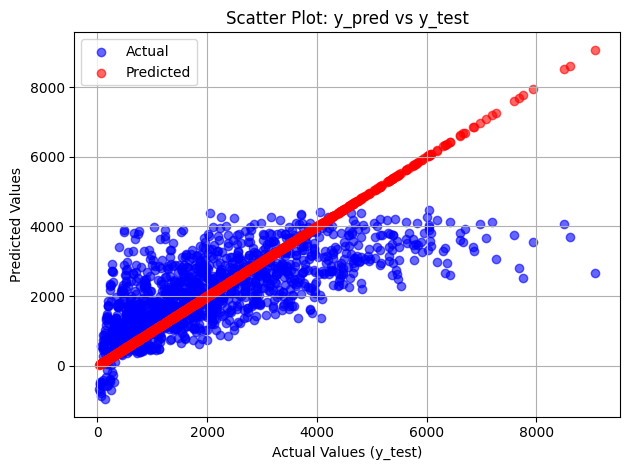

In [86]:
plt.scatter(Y_test, y_pred, color='blue', alpha=0.6, label='Actual')
plt.scatter(Y_test, Y_test, color='red', alpha=0.6, label='Predicted')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: y_pred vs y_test")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **IMPLEMENTING ERROR FUNCTIONS: MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR, MEAN ABSOLUTE ERROR**

In [83]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

mse = mean_squared_error(Y_test,y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae
mae = mean_absolute_error(Y_test,y_pred)
print(mae)

1273584.9656294968
1128.5322173644388
836.9207797634093
